![OMNIS2_Logo_projektu.png](../figures/OMNIS2_Logo_projektu.png)

# Ćwiczenie 15: Tablice dynamiczne dwuwymiarowe

autor: Maciej Kachniarz

## Wprowadzenie

W tym ćwiczeniu zapoznasz się z zagadnieniem tablic dynamicznych dwuwymiarowych. Nauczysz się alokować pamięć dla dwuwymiarowej tablicy dynamicznej, zwalniać pamięć po takiej tablicy oraz poznasz podobieństwa i różnice między tablicą dwuwymiarową statyczną i dynamiczną.

## Przygotowanie notatnika
Wykonaj poniższą komórkę, aby przygotować niniejszy notatnik do pracy. Załączymy znane Ci już moduły, które będą przydatne w ramach tego ćwiczenia.

In [ ]:
#include <iostream>
#include <iomanip>
#include <cstdlib>
#include <ctime>
#include <fstream>
using namespace std;

## Tablica dynamiczna dwuwymiarowa
W poprzednim ćwiczeniu zapoznałeś się już z podstawami obsługi tablic dynamicznych jednowymiarowych. Podobnie jak w przypadku tablic statycznych, omawianych we wcześniejszych ćwiczeniach, możliwe jest tworzenie tablic dynamicznych wielowymiarowych, w szczególności tablic dynamicznych dwuwymiarowych.

**Tablica dynamiczna dwuwymiarowa**, podobnie jak tablica dynamiczna jednowymiarowa, przechowuje określoną liczbę wartości tego samego typu w ciągłym obszarze pamięci. W odróżnieniu od niej składa się z wierszy i kolumn. Posiada wszystkie zalety tablicy dynamicznej jednowymiarowej – programista ma pełną kontrolę nad momentem utworzenia i usunięcia tablicy, a ze względu na jej alokację na stercie może osiągać znacznie większe rozmiary, niż tablica statyczna. Na poniższym rysunku przedstawiono schematyczną ilustrację graficzną tablicy dynamicznej dwuwymiarowej.

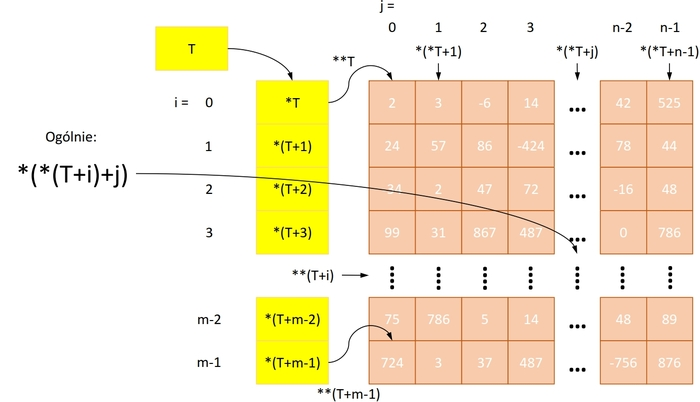

W ujęciu przedstawionym na powyższym rysunku, tablicę dynamiczną dwuwymiarową należy rozpatrywać bardziej jak tablicę tablic jednowymiarowych, niż jednolity twór taki, jak tablica statyczna dwuwymiarowa. W istocie wiersze tablicy dynamicznej dwuwymiarowej są osobnymi tablicami dynamicznymi jednowymiarowymi (z reguły o jednakowym rozmiarze), których adresy są przechowywane w jednowymiarowej tablicy wskaźników. Kolorem żółtym na rysunku oznaczono właśnie tą tablicę wskaźników – każdy jej element przechowuje adres i-tego wiersza tablicy dwuwymiarowej, który jest jednowymiarową tablicą dynamiczną danych – kolor pomarańczowy. Kluczem dostępu do całej tej struktury danych jest wskaźnik `T`, który przechowuje adres jednowymiarowej tablicy wskaźników dającej dostęp do poszczególnych wierszy. Dostęp do komórki o współrzędnych `[i][j]` uzyskuje się więc pośrednio – spod adresu przechowywanego we wskaźniku `T` uzyskujemy dostęp do `i`-tej komórki jednowymiarowej tablicy dynamicznej wskaźników, która zawiera adres `i`-tego wiersza. Spod tego adresu uzyskujemy dostęp do `j`-tego elementu tej tablicy jednowymiarowej, czyli elementu leżącego w `i`-tym wierszu i `j`-tej kolumnie tablicy dwuwymiarowej.

## Alokacja pamięci dla tablicy dynamicznej dwuwymiarowej
Jak ustaliliśmy wcześniej, tablicę dynamiczną dwuwymiarową należy w istocie rozpatrywać jako tablicę wskaźników do tablic jednowymiarowych, traktowanych jako wiersze tablicy dwuwymiarowej. Z tego względu alokacja pamięci dla tablicy dwuwymiarowej o `w` wierszach i `k` kolumnach przebiega w dwóch etapach:
- Etap I: **Alokacja pamięci dla jednowymiarowej tablicy wskaźników**

Zarezerwowanie pamięci dla jednowymiarowej tablicy wskaźników na typ docelowy (w tym przypadku typem docelowym jest `int` – tablica ma przechowywać liczby całkowite). Tablica ta ma rozmiar odpowiadający docelowej liczbie wierszy tablicy dwuwymiarowej, w tym przypadku tablica ma liczyć `w` wierszy:
```c++
int **TAB = new int* [w];
```
Ponieważ `TAB` jest wskaźnikiem do tablicy wskaźników, w definicji nazwę poprzedza się podwójnym symbolem asterysk (gwiazdka *) – należy to rozumieć w taki sposób, że `TAB` jest wskaźnikiem (pierwszy asterysk), który przechowuje adres do obiektu również będącego wskaźnikiem (drugi asterysk). 

- Etap II: **Alokacja jednowymiarowych tablic dynamicznych typu docelowego**

Drugi krok polega na `w`-krotnej alokacji pamięci pod tablicę dynamiczną jednowymiarową typu docelowego (tu typem docelowym jest `int`). Każda z tych tablic ma rozmiar odpowiadający docelowej liczbie kolumn `k`:
```c++
for(int i = 0; i < w; i++)
    TAB[i] = new int [k] ;
```
W każdej iteracji adres alokowanej tablicy jednowymiarowej typu `int` jest zapisywany w `i`-tej komórce tablicy wskaźników `int*`. W ten sposób tablica wskaźników staje się "kluczem dostępu" do poszczególnych wierszy tablicy dwuwymiarowej – jest spisem adresów kolejnych wierszy.

W powyższym przykładzie dokonywaliśmy alokacji pamięci dla dwuwymiarowej tablicy dynamicznej o wymiarach `w x k`. Jeśli oba wymiary będą sobie równe (tyle samo wierszy i kolumn), to będziemy mieli do czynienia z tablicą dynamiczną kwadratową, podobnie jak w przypadku tablicy statycznej kwadratowej.

## Zwalnianie pamięci po tablicy dynamicznej dwuwymiarowej
Zwalnianie pamięci po dwuwymiarowej tablicy dynamicznej również przebiega w dwóch etapach:
- Etap I: **Zwalnianie pamięci po tablicach jednowymiarowych**

W pierwszym etapie należy `w`-krotnie zwolnić pamięć po tablicach jednowymiarowych przechowujących dane (wierszach tablicy dwuwymiarowej):
```c++
for(int i = 0; i < w; i++)
    delete [] TAB[i]; 
```
Polega to na zwalnianiu pamięci pod kolejnymi adresami w tablicy wskaźników `TAB` –  kolejnych tablic dynamicznych jednowymiarowych.
- Etap II: **Zwolnienie pamięci po tablicy wskaźników**

Gdy wszystkie wiersze, czyli jednowymiarowe tablice dynamiczne danych, zostały już usunięte, należy jeszcze zwolnić pamięć po jednowymiarowej tablicy wskaźników:
```c++
delete [] TAB;
TAB = nullptr; 
```
Warto również “wyzerować” wskaźnik *TAB* wartością `nullptr` tak, aby wskaźnik nie przechowywał dalej adresu zwolnionego już obszaru pamięci.

Zwróć uwagę, że przy obsłudze tablic dynamicznych dwuwymiarowych nadal zachowana jest reguła, że operatora `delete` należy użyć w programie tyle razy, ile razy użyto operatora `new`. Użyliśmy operatora `new` `w+1` razy – alokacja tablicy wskaźników i `w` tablic jednowymiarowych. Operator `delete` został użyty w programie `w+1` razy – zwolnienie pamięci po *w* tablicach jednowymiarowych i zwolnienie pamięci po tablicy wskaźników.

## Poruszanie się po dwuwymiarowej tablicy dynamicznej
Po tablicy dwuwymiarowej dynamicznej można poruszać się dokładnie tak, jak po tablicy dwuwymiarowej statycznej. Poniższy przykład pozwoli Ci zaobserwować działanie takiej tablicy.

### Zadanie 15.1.
Napisz program wczytujący od użytkownika liczby całkowite `m` i `n`. Utwórz dwuwymiarową tablicę dynamiczną o wymiarach `m x n` i wczytuj do niej znaki z pliku o nazwie podanej przez użytkownika. Jeśli w pliku jest zbyt mało znaków, pozostałe elementy tablicy wypełnij znakiem `'?'`. Wypisz zawartość tablicy w konsoli. 
**UWAGA**: Pamiętaj o usunięciu tablic dynamicznych przed zakończeniem programu. Do testu programu możesz użyć załączonego pliku `"znaki.txt"`.

In [ ]:
int m,n;
cout << "Podaj wymiary tablicy: ";
cin >> m >> n;
string nazwa;
cout << "Podaj nazwe pliku: ";
cin >> nazwa;
ifstream plik_we(nazwa);

// TO DO: zdefiniuj wskaźnik do tablicy dwuwymiarowej znaków i dokonaj alokacji pamięci pod m-elementową tablicę wskaźników do wierszy tablicy

for(int i = 0; i < m; i++)
    // TO DO: dokonaj alokacji pamięci pod m tablic jednowymiarowych - wierszy tablicy dwuwymiarowej, 
    // adres każdej z tablic wpisz do odpowiedniej komórki tablicy wskaźników
    
// TO DO: napisz parę pętli for służacych do poruszania się po tablicy dynamicznej duwymiarowej, korzystając z indeksowania komórek tablicy
// w każdej iteracji dokonaj próby odczytu danych z pliku z kontrolą poprawności (jeśli odczyt niepoprawny, wpisz do komórki znak ?)
// i wypisuj zawartość bieżącej wypełnionej komórki

for(int i = 0; i < m; i++)
    // TO DO: zwolnij pamięć po wszytskich wierszach tablicy

// TO DO: zwolnij pamięć po tablicy adresów
// TO DO: wyzeruj wskaźnik do tablicy wartością nullptr

Rozwiń poniższy fragment kodu, aby zobaczyć rozwiązanie.

<details>
    <summary>Rozwiązanie</summary>

```c++
int m,n;
cout << "Podaj wymiary tablicy: ";
cin >> m >> n;
string nazwa;
cout << "Podaj nazwe pliku: ";
cin >> nazwa;
ifstream plik_we(nazwa);

char **TAB = new char* [m];

for(int i = 0; i < m; i++)
    TAB[i] = new char [n];
    
for(int i = 0; i < m; i++){
    for(int j = 0; j < n; j++){
        plik_we >> TAB[i][j];
        if(plik_we.eof())
            TAB[i][j] = '?';
        cout << setw(4) << TAB[i][j];
    }
    cout << endl;
}

for(int i = 0; i < m; i++)
    delete [] TAB[i];

delete [] TAB;
TAB = nullptr;
plik_we.close(); 
```

Jak widzisz, dostęp do elementów tablicy dynamicznej nie odbiega znacząco od tablicy statycznej. 

### Arytmetyka wskaźników

Dostęp przez indeksy komórek tablicy, choć wygodny, nie jest najszybszym sposobe. Bardziej efektywną alternatywą jest wykorzystanie tzw. **arytmetyki wskaźników**. Dla danych przechowywanych we wskaźnikach (adresów) zdefiniowane są operacje dodawania (operator `+`) i odejmowania (operator `-`). Są one zdefiniowane tak, że do danej wartości wskaźnika (pamiętanego w nim adresu) dodaje się (odejmuje się) całkowitą krotność rozmiaru obiektów typu wskazywanego przez wskaźnik, np. zapis:
```c++
int *w = new int;
w += 2; 
```
Oznacza, że po wykonaniu instrukcji `w += 2;` wskaźnik nie wskazuje już na zmienną dynamiczną utworzoną w pierwszej instrukcji, ale na obszar pamięci o adresie większym o dwa rozmiary obiektu typu `int` (jeśli typ `int` zajmuje 4 bajty w pamięci, to wskaźnik będzie wskazywał na adres o 2 * 4 B = 8 B większy, niż na początku). Pamiętając adres początku tablicy we wskaźniku i wykonując na nim odpowiednie operacje arytmetyczne, można poruszać się po tablicy. W przypadku poruszania się po tablicy dynamicznej jednowymiarowej, zapis wyglądałby następująco:
```c++
int n = 10;
int *T = new int [n];
for(int i = 0; i < n; i++)
    *(T+i) = -100 + rand()%201; 
 ```
Interesująca nas linijka to `*(T+i) = -100 + rand()%201;`. Zapis `*(T+i)` co do efektów działania jest równoważny zapisowi `T[i]` – jest to odwołanie do `i`-tej komórki tablicy jednowymiarowej `T`.  Jednak realizacja tego odwołania jest odmienna. Wyrażenie `*(T+i)` oznacza, że bierzemy adres pamiętany we wskaźniku `T` i w każdej iteracji dodajemy do niego aktualną wartość licznika iteracji `i`. Zauważ, że nie nadpisujemy adresu we wskaźniku `T`, on nadal jest ustawiony na początku tablicy. Jeśli mamy już ustalony interesujący nas w danej iteracji adres, to operatorem asterysk dokonujemy odczytu zawartości obszaru pamięci pod tym adresem (tzw. wyłuskanie). W zerowej iteracji odczytamy zerową komórkę tablicy pod adresem pamiętanym we wskaźniku `T`. W iteracji `i = 1` odczytamy komórkę pod adresem większym o `1` rozmiar danych przechowywanych w tablicy (w przykładzie mamy typ `int`, więc przeskoczymy o 4 B), w  iteracji `i = 2` odczytamy komórkę o adresie o `2` rozmiary większym itd. Wynik będzie więc taki sam, jak przy tradycyjnym indeksowaniu tablicy, jednak metoda oparta na arytmetyce wskaźników jest nieco szybsza w realizacji – może to mieć znaczenie przy pracy z dużymi zbiorami danych.

W tablicy dwuwymiarowej zapis oparty na arytmetyce wskaźników nieco bardziej się komplikuje, z uwagi na pośredni dostęp do wierszy przez tablicę adresów. Ogólnie odwołanie do komórki o współrzędnych `[i][j]` będzie wyglądało następująco:
```c++
for(int i = 0; i < m; i++)
    for(int j = 0; j < n; j++)
        *(*(T+i)+j) = -100 + rand()%201;
 ```
Rozłóżmy teraz wyrażenie `*(*(T+i)+j)` na kolejne kroki, poczynając od wewnętrznego nawiasu:
- `(T+i)` – oznacza, że bierzemy adres ze wskaźnika `T` i dodajemy do niego `i`-krotność rozmiaru danych w poszczególnych komórkach tablicy. Pamiętaj, że `T` przechowuje adres tablicy wskaźników – w ten sposób wybierzemy więc `i`-tą komórkę w tablicy adresów.
- `*(T+i)` – operatorem asterysk dokonujemy odczytu zawartości `i`-tej komórki tablicy wskaźników. Komórka ta zawiera adres `i`-tego wiersza tablicy dwuwymiarowej. Mamy więc już ustalone w pamięci położenie wiersza – znamy adres jego początku.
- `(*(T+i)+j)` –  do odczytanego z tablicy wskaźników adresu `i`-tego wiersza dodajemy `j`, czyli względem adresu początku wiersza przesuwamy się o `j` pozycji, aby wybrać interesujący nas element.
-  `*(*(T+i)+j)` – ostatecznie spod ustalonego adresu `j`-tego elementu w `i`-tym wierszu uzyskujemy dostęp do zawartości obszaru pamięci pod tym adresem, czyli komórki tablicy o współrzędnych `[i][j]`.

Jak widzisz, zapis ten jest logiczny, jeśli przeanalizujemy go "od środka". Aby samodzielnie prześledzić działanie tej techniki, rozwiąż poniższe zadanie.

### Zadanie 15.2.
Zmodyfikuj kod z zadania 15.1 tak, aby wypełnianie i wypisywanie zawartości komórek tablicy dynamicznej dwuwymiarowej odbywało się poprzez dostęp za pomocą wskaźników, a nie poprzez indeksowanie komórek.

In [ ]:
int m,n;
cout << "Podaj wymiary tablicy: ";
cin >> m >> n;
string nazwa;
cout << "Podaj nazwe pliku: ";
cin >> nazwa;
ifstream plik_we(nazwa);

char **TAB = new char* [m];

for(int i = 0; i < m; i++)
    TAB[i] = new char [n];
    
for(int i = 0; i < m; i++){
    for(int j = 0; j < n; j++){
        // TO DO: wpisz wartość z pliku do komórki tablicy uzyskując dostęp poprzez wskaźniki
        if(plik_we.eof())
            // TO DO: przypisz stałą wartość '?' do komórki tablicy uzyskując dostęp poprzez wskaźniki
        // TO DO: wypisz czytelnie zawartość kolejnych komórek tablicy uzyskując dostęp poprzez wskaźnik
    }
    cout << endl;
}

for(int i = 0; i < m; i++)
    delete [] TAB[i];

delete [] TAB;
TAB = nullptr;
plik_we.close();

Rozwiń poniższy fragment kodu, aby zobaczyć rozwiązanie.

<details>
    <summary>Rozwiązanie</summary>

```c++
int m,n;
cout << "Podaj wymiary tablicy: ";
cin >> m >> n;
string nazwa;
cout << "Podaj nazwe pliku: ";
cin >> nazwa;
ifstream plik_we(nazwa);

char **TAB = new char* [m];

for(int i = 0; i < m; i++)
    TAB[i] = new char [n];
    
for(int i = 0; i < m; i++){
    for(int j = 0; j < n; j++){
        plik_we >> *(*(TAB+i)+j);
        if(plik_we.eof())
            *(*(TAB+i)+j) = '?';
        cout << setw(4) << *(*(TAB+i)+j);
    }
    cout << endl;
}

for(int i = 0; i < m; i++)
    delete [] TAB[i];

delete [] TAB;
TAB = nullptr;
plik_we.close(); 
```

## Tablice dynamiczne dwuwymiarowe i funkcje
Obsługa tablic dynamicznych dwuwymiarowych w funkcjach wiąże się, podobnie jak w przypadku tablic dynamicznych jednowymiarowych, z koniecznością przekazania do funkcji nie tylko wskaźnika do tablicy, ale również jej wymiarów. W przypadku funkcji dokonującej alokacji pamięci dla tablicy dynamicznej dwuwymiarowej, adres alokowanego obszaru pamięci można wyprowadzić z funkcji na dwa sposoby:
1. **Zwrócenie adresu alokowanego obszaru pamięci instrukcją return:**
```c++
int** tworzenie(int w, int k){
    int** TAB = new int* [w];
    for(int i = 0; i < w; i++)
    	TAB[i] = new int [k];
    for(int i = 0; i < w; i++)
        for(int j = 0; j < k; j++)
            *(*(TAB+i)+j) = -100 + rand()%201;
	return TAB;
}
```
W tym przypadku funkcja jest typu `int**` tak, aby mogła zwrócić wskaźnik do tablicy wskaźników na typ docelowy (w przykładzie `int`). Wynik wywołania funkcji – zwrócony adres, należy przypisać do zdefiniowanego przed jej wywołaniem wskaźnika do obiektu wskaźnikowego:
```c++
int main(){
    int wiersze, kolumny;
    cin >> wiersze >> kolumny;
    int** Tablica = tworzenie(wiersze,kolumny);
}
```
2. **Wyprowadzenie adresu alokowanego obszaru pamięci przez referencję:**
```c++
void tworzenie(int**& TAB, int w, int k){
    TAB = new int* [w];
    for(int i = 0; i < w; i++)
    	TAB[i] = new int [k];
    for(int i = 0; i < w; i++)
        for(int j = 0; j < k; j++)
            *(*(TAB+i)+j) = -100 + rand()%201;
}
```
W tej wersji funkcja jest typu `void` – z założenia nie zwraca wartości. Przyjmuje jednak przez referencję wskaźnik do tablicy wskaźników, do którego przypisuje adres alokowanego dla tablicy obszaru pamięci. Jak już zapewne wiesz, przekazanie przez referencję powoduje trwałą modyfikację wartości argumentu (a nie jego lokalnej kopii), więc przypisanie adresu alokowanego obszaru pamięci obowiązuje również poza funkcją. Przy wywołaniu funkcji należy przekazać do niej, oprócz wymiarów tablicy, zdefiniowany uprzednio wskaźnik do obiektu wskaźnikowego:
```c++
int main(){
    int wiersze, kolumny;
    cin >> wiersze >> kolumny;
    int** Tablica = nullptr;
    tworzenie(Tablica, wiersze, kolumny);
}
```

W przypadku funkcji przetwarzających dane w tablicy, np. wypisywanie, przeszukiwanie, modyfikacja wartości, przekazanie wskaźnika do tablicy powinno odbywać się bez referencji, np.:
```c++
void wypisz(int** TAB, int w, int k){
    for(int i = 0; i < w; i++){
        for(int j = 0; j < k; j++)
            cout << TAB[i][j] << ‘\t’;
        cout << endl;
    }
}
```
Brak referencji w takim przypadku zapobiega nieumyślnej zmianie wartości wskaźnika do tablicy, co skutkowałoby utratą dostępu do jej zawartości. Użycie referencji jest natomiast wskazane w przypadku funkcji zwalniającej pamięć po tablicy – umożliwia trwałe „wyzerowanie” wskaźnika do tablicy wartością `nullptr` („odłączenie” wskaźnika od zwolnionego obszaru pamięci). Typowa funkcja zwalniająca pamięć po dwuwymiarowej tablicy dynamicznej ma postać:
```c++
void usun(int**& TAB, int w){
    for(int i = 0; i < w; i++)
    	delete [] TAB[i];
    delete [] TAB;
    TAB = nullptr;
}
```
Zwróć uwagę, że w tej funkcji wystarczy przekazanie liczby wierszy – znajomość liczby kolumn w tablicy nie jest niezbędna.

### Zadanie 15.3.

Napisz następujące funkcje:
1. Funkcja alokująca pamięć dla kwadratowej tablicy dynamicznej liczb rzeczywistych o wymiarach `n` x `n` i wypełniająca ją wartościami losowymi z przedziału <-10,10>.
2. Funkcja wypisująca zawartość kwadratowej tablicy dynamicznej liczb rzeczywistych o wymiarach `n` x `n`, wypisując liczby w formacie dziesiętnym (fixed) z 3 miejscami dziesiętnymi.
3. Funkcja, która oblicza i zwraca średnią elementów na obwodzie kwadratowej tablicy dynamicznej liczb rzeczywistych o wymiarach `n` x `n` i zastępuje jej wartością elementy na drugiej przekątnej tablicy.
4. Funkcja zwalniająca pamięć po kwadratowej tablicy dynamicznej liczb rzeczywistych o wymiarach `n` x `n`.

Następnie wczytaj od użytkownika rozmiar tablicy i wywołaj napisane funkcje. Pamiętaj, aby wypisać tablicę przed i po modyfikacji.

In [ ]:
// TO DO: napisz funkcję 1, zwracając adres przez nazwę lub przez referencję (do wyboru)

In [ ]:
// TO DO: napisz funkcję 2

In [ ]:
// TO DO: napisz funkcję 3

In [ ]:
// TO DO: napisz funkcję 4

In [ ]:
// TO DO: wczytaj od użytkownika rozmiar tablicy
// TO DO: utwórz i wypełnij tablicę, wypisz ją, zmodyfikuj i ponownie wypisz, a na końcu usuń

Rozwiń poniższy fragment kodu, aby zobaczyć rozwiązanie.

<details>
    <summary>Rozwiązanie</summary>

```c++
// Funkcja 1 - wariant ze zwracaniem adresu
float** tworzenie(int n){
    float** TAB = new float* [n];
    for(int i = 0; i < n; i++)
        TAB[i] = new float [n];
    for(int i = 0; i < n; i++)
        for(int j = 0; j < n; j++)
            TAB[i][j] = -10 + 20*(rand()/double(RAND_MAX));
    return TAB;
}

// Funkcja 2
void wypisz(float** TAB, int n){
    for(int i = 0; i < n; i++){
        for(int j = 0; j < n; j++)
            cout << setw(8) << fixed << setprecision(3) << *(*(TAB+i)+j);
        cout << endl;
    }
}

// Funkcja 3
float zmiana(float** TAB, int n){
    float srednia = 0;
    int licznik = 0;
    for(int i = 0; i < n; i++)
        for(int j = 0; j < n; j++)
            if(i == 0 || j == 0 || i == n-1 || j == n-1){
                srednia += TAB[i][j];
                licznik++;
            }
    srednia = srednia/licznik;
    for(int i = 0; i < n; i++)      // do przejścia po drugiej przekątnej wystarczy jedna pętla
        TAB[i][n-1-i] = srednia;
    return srednia;
}

// Funkcja 4
void usun(float**& TAB, int n){
    for(int i = 0; i < n; i++)
    	delete [] TAB[i];
    delete [] TAB;
    TAB = nullptr;
}

// Wywołania
srand(time(0));
int n;
cout << "Podaj rozmiar tablicy: ";
cin >> n;
float **Tablica = tworzenie(n);
wypisz(Tablica,n);
cout << endl << "Srednia z obwodu wynosi: " << zmiana(Tablica,n) << endl << endl;
wypisz(Tablica,n);
usun(Tablica,n); 
```

## Dwuwymiarowe tablice dynamiczne rekordów
Podobnie, jak w przypadku tablic statycznych i tablic dynamicznych jednowymiarowych, komórki tablicy dynamicznej dwuwymiarowej mogą przechowywać również rekordy, zdefiniowane uprzednio strukturą. W takim przypadku typem docelowym danych jest struktura, a tablicę wskaźników alokuje się ze wskaźnikowym typem rekordowym:
```c++
struct Dane {
    int liczba;
    char znak;
};

Dane** tworzenie(int n){
    Dane** TAB = new Dane* [n];	// alokacja tablicy wskaźników do jednowymiarowych tablic rekordów
    for(int i = 0; i < n; i++)
    	TAB[i] = new Dane [n];
    // wypełnienie tablicy
    return TAB;
}
```
Dostęp do zawartości poszczególnych rekordów w tablicy można przeprowadzić tak samo, jak w przypadku statycznej dwuwymiarowej tablicy rekordów:
```c++
for(int i = 0; i < n; i++){
	for(int j = 0; j < n; j++){
		TAB[i][j].liczba = rand()%201;
		TAB[i][j].znak = 33+rand()%(126-33+1);
	}
	cout << endl;
}
```
Możliwy jest jednak również dostęp poprzez wskaźniki. Zapis staje się jednak bardziej skomplikowany i może przyjąć jeden z dwóch wariantów:
1. `(*(*(TAB+i)+j)).nazwa_pola` – zawartość zewnętrznych nawiasów należy interpretować jak poprzednio – jest to odczyt `j`-tej komórki w `i`-tym wierszu tablicy. Skoro jednak komórka ta zawiera rekord, to po kropce uzyskuje się dostęp do konkretnego pola. Aby zapewnić prawidłową kolejność wykonania operatorów, konieczne są jednak zewnętrzne nawiasy – najpierw ma być odczytany rekord o współrzędnych `[i][j]`, dopiero potem jego konkretne pole.
2. `(*(TAB+i)+j)->nazwa_pola` – w tym wariancie wykorzystany jest  operator `->` charakterystyczny dla rekordów dynamicznych (tablica zawiera przecież rekordy). Sens wyrażenia w nawiasie jest podobny jak poprzednio – odczytujemy adres `j`-tego elementu w `i`-tym wierszu tablicy. Natomiast rolę zewnętrznego operatora wyłuskania (symbol asterysk) przejmuje operator `->`, który jednocześnie realizuje dostęp do wskazanego pola wyłuskanego rekordu.

Spróbuj prześledzić obsługę dwuwymiarowej tablicy dynamicznej rekordów, rozwiązując poniższe zadanie. 

### Zadanie 15.4.
Zdefiniuj strukturę `Zesp` o dwóch polach liczbowych całkowitych do przechowywania części rzeczywistej i urojonej liczby zespolonej. Napisz następujące funkcje (wypróbuj różne metody dostępu do pól rekordów w tablicy):
1. Funkcja zwracająca przez nazwę lub przez referencję (do wyboru) adres nowo utworzonej macierzy liczb zespolonych – dwuwymiarowej tablicy dynamicznej rekordów struktury `Zesp` o wymiarach podanych jako argumenty funkcji i wczytująca do macierzy losowe wartości liczb zespolonych. Przyjąć zakres losowania wartości obu części liczby zespolonej <-100, 100>.
2. Funkcja wypisująca czytelnie w konsoli macierz liczb zespolonych (dwuwymiarową tablicę dynamiczną rekordów struktury `Zesp`) podaną jako argument funkcji.
3. Funkcja zwracająca przez nazwę macierz (dwuwymiarową tablicę dynamiczną rekordów struktury `Zesp`) będącą wynikiem sumowania dwóch macierzy liczb zespolonych podanych jako argumenty funkcji (sumowanie macierzy liczb zespolonych przebiega jak sumowanie macierzy liczb rzeczywistych – sumuje się liczby zespolone na odpowiadających sobie pozycjach wg reguł sumowania liczb zespolonych).
4. Funkcja zapisująca do pliku o nazwie podanej jako argument funkcji macierz liczb zespolonych (dwuwymiarową tablicę dynamiczną rekordów struktury `Zesp`) podaną jako argument funkcji.
5. Funkcja zwalniająca pamięć po macierzy liczb zespolonych (dwuwymiarowej tablicy dynamicznej rekordów struktury `Zesp`) podanej jako argument funkcji. 

Następnie napisz program wykorzystujący powyższe funkcje, który tworzy i wypełnia dwie macierze o wymiarach wczytanych od użytkownika losowymi liczbami zespolonymi, wypisuje je w konsoli oraz dokonuje ich sumowania, a wynikową macierz wypisuje w konsoli i zapisuje do pliku o nazwie wczytanej od użytkownika. **UWAGA:** Pamiętaj o usunięciu wszystkich tablic dynamicznych.

In [ ]:
// TO DO: zdefiniuj strukturę Zesp

In [ ]:
// TO DO: napisz funkcję 1, zwracając adres przez nazwę lub przez referencję (do wyboru)

In [ ]:
// TO DO: napisz funkcję 2

In [ ]:
// TO DO: napisz funkcję 3

In [ ]:
// TO DO: napisz funkcję 4

In [ ]:
// TO DO: napisz funkcję 5

In [ ]:
// TO DO: wczytaj od użytkownika wymiary tablicy
// TO DO: wywołaj napisane funkcje

Rozwiń poniższy fragment kodu, aby zobaczyć rozwiązanie.

<details>
    <summary>Rozwiązanie</summary>

```c++
// Definicja struktury
struct Zesp{
    int rez, imz;
};

// Funkcja 1 - wariant ze zwracamniem adresu przez referencję
void macierz(Zesp**& TAB, int m, int n){
    TAB = new Zesp* [m];
    for(int i = 0; i < m; i++)
        TAB[i] = new Zesp [n];

    for(int i = 0; i < m; i++)
        for(int j = 0; j < n; j++){
            TAB[i][j].rez = -100 + rand()%201;     // dostęp przez indeksy
            TAB[i][j].imz = -100 + rand()%201;
        }
}

// Funkcja 2
void wypisz(Zesp** TAB, int m, int n){
    for(int i = 0; i < m; i++){
        for(int j = 0; j < n; j++)
            cout << setw(15) << (*(*(TAB+i)+j)).rez << " + i(" << (*(*(TAB+i)+j)).imz << ')';   // dostęp przez wskaźniki - wariant 1
        cout << endl;
    }
}

// Funkcja 3
Zesp** suma(Zesp** TAB1, Zesp** TAB2, int m, int n){
    // Macierz przechowująca sumę będzie miała takie same rozmiary, jak sumowane macierze
    Zesp** SUM = new Zesp* [m];
    for(int i = 0; i < m; i++)
        SUM[i] = new Zesp [n];

    for(int i = 0; i < m; i++)
        for(int j = 0; j < n; j++){
            (*(SUM+i)+j)->rez = (*(TAB1+i)+j)->rez + (*(TAB2+i)+j)->rez;      // dostęp przez wskaźniki - wariant 2
            (*(SUM+i)+j)->imz = (*(TAB1+i)+j)->imz + (*(TAB2+i)+j)->imz;
        }
    return SUM;
}

// Funkcja 4
void zapisz(Zesp** TAB, int m, int n, string nazwa){
    ofstream plik_wy(nazwa);
    for(int i = 0; i < m; i++){
        for(int j = 0; j < n; j++)
            plik_wy << setw(15) << (*(*(TAB+i)+j)).rez << " + i(" << (*(*(TAB+i)+j)).imz << ')';   // dostęp przez wskaźniki - wariant 1
        plik_wy << endl;
    }
    plik_wy.close();
}

// Funkcja 5
void usun(Zesp**& TAB, int m){
    for(int i = 0; i < m; i++)
        delete [] TAB[i];
    delete [] TAB;
    TAB = nullptr;
}

// Program
srand(time(0));
int m,n;
cout << "Podaj rozmiary macierzy: ";
cin >> m >> n;
Zesp** M1 = nullptr;
Zesp** M2 = nullptr;
macierz(M1,m,n);
macierz(M2,m,n);
cout << "Macierz 1:" << endl;
wypisz(M1,m,n);
cout << endl << endl;
cout << "Macierz 2:" << endl;
wypisz(M2,m,n);
Zesp** SUMA = suma(M1,M2,m,n);
cout << endl << endl;
cout << "Suma M1 + M2:" << endl;
wypisz(SUMA,m,n);
string nazwa;
cout << "Podaj nazwe pliku do zapisu: ";
cin >> nazwa;
zapisz(SUMA,m,n,nazwa);
usun(M1,m);
usun(M2,m);
usun(SUMA,m); 
```

## Zadania do samodzielnego rozwiązania
Na zakończenie kilka zadań do samodzielnego rozwiązania, dotyczące posługiwania się dwuwymiarowymi tablicami dynamicznymi.

### Zadanie 15.5.
Napisz następujące funkcje:
1. Funkcja alokująca pamięć dla kwadratowej tablicy dynamicznej liczb całkowitych o wymiarach *n* x *n* (wybrać metodę zwracania adresu) i wypełniająca ją wartościami losowymi z przedziału <-50,50>.
2. Funkcja wypisująca czytelnie zawartość kwadratowej tablicy dynamicznej liczb całkowitych o wymiarach *n* x *n*.
3. Funkcja obliczająca i zwracająca przez nazwę średnią w jednowymiarowej tablicy dynamicznej liczb całkowitych o rozmiarze *n*.
4. Funkcja, która w kwadratowej tablicy dynamicznej liczb całkowitych o wymiarach *n* x *n* zamienia miejscami wiersze o największej i najmniejszej średniej – do obliczania średnich w wierszach użyć funkcji 3, przekazując kolejne wiersze jako argumenty. Podpowiedź: aby zamienić miejscami wiersze, wystarczy zamienić miejscami ich adresy w tablicy wskaźników.
5. Funkcja zwalniająca pamięć po kwadratowej tablicy dynamicznej liczb całkowitych o wymiarach *n* x *n*.

Następnie wczytaj od użytkownika rozmiar tablicy i wywołaj napisane funkcje. Pamiętaj, aby wypisać tablicę przed i po modyfikacji.

In [ ]:
// TO DO: napisz funkcję 1, zwracając adres przez nazwę lub przez referencję (do wyboru)

In [ ]:
// TO DO: napisz funkcję 2

In [ ]:
// TO DO: napisz funkcję 3

In [ ]:
// TO DO: napisz funkcję 4

In [ ]:
// TO DO: napisz funkcję 5

In [ ]:
// TO DO: wczytaj od użytkownika rozmiar tablicy
// TO DO: wywołaj napisane funkcje

Rozwiń poniższy fragment kodu, aby zobaczyć rozwiązanie.

<details>
    <summary>Rozwiązanie</summary>

```c++
// Funkcja 1 - wariant ze zwracamniem adresu przez nazwę
int** tablica(int n){
    int** T = new int* [n];
    for(int i = 0; i < n; i++)
        T[i] = new int [n];
    for(int i = 0; i < n; i++)
        for(int j = 0; j < n; j++)
            T[i][j] = -50 + rand()%101;
    return T;
}

// Funkcja 2
void wypisz(int** T, int n){
    for(int i = 0; i < n; i++){
        for(int j = 0; j < n; j++)
            cout << setw(8) << T[i][j];
        cout << endl;
    }
}

// Funkcja 3
float srednia(int* T, int n){
    int suma = 0;
    for(int i = 0; i < n; i++)
        suma += T[i];
    return float(suma)/n;
}

// Funkcja 4
void zamiana(int** T, int n){
    // Poszukiwane są indeksy adresów wierszy w tablicy wskaźników
    int i_min = 0;
    int i_max = 0;
    // Początkowo wierszem o najwiękjszej i najmniejszej średniej jest wiersz 0 - inicjalizacja zmiennych wartościami z tablicy
    float s_min = srednia(T[0],n);
    float s_max = s_min;
    // Przeszukiwanie od wiersza 1 - zerowy jest na początku odniesieniem
    for(int i = 1; i < n; i++){
        float s = srednia(T[i],n); // obliczamy średnie w kolejnych wierszach
        if(s < s_min){
            i_min = i;
            s_min = s;
        }
        if(s > s_max){
            i_max = i;
            s_max = s;
        }

    }
    // Do efektywnej zamiany wystarczy zamieć wartości adresów wierszy w tablicy wskaźników - adres wiersza o najmniejszej średniej
    // zapisujemy we wskaźniku pomocniczym, następnie nadpisujemy go adresem wiersza o największej średniej, na koniec ze wskaźnika
    // pomocniczego wpisujemy adres wiersza o najmniejszej średniej do komórki, w której znajdował się adres wiersza o największej średniej
    int* tmp = T[i_min];
    T[i_min] = T[i_max];
    T[i_max] = tmp;
}

// Funkcja 5
void usun(int** T, int n){
    for(int i = 0; i < n; i++)
        delete [] T[i];
    delete [] T;
    T = nullptr;
}

// Program
srand(time(0));
int n;
cout << "Podaj rozmiar tablicy kwadratowej: ";
cin >> n;
int** TAB = tablica(n);
cout << "Tablica przed modyfikacja:" << endl;
wypisz(TAB,n);
cout << endl;
zamiana(TAB,n);
cout << "Tablica po modyfikacji:" << endl;
wypisz(TAB,n);
cout << endl;
usun(TAB,n); 
```

### Zadanie 15.6.
Napisz następujące funkcje (uwaga: poprzez słowo macierz rozumiemy tu dwuwymiarową tablicę dynamiczną liczb całkowitych):
1. Funkcja alokująca pamięć dla macierzy liczb całkowitych o wymiarach *m* x *n* podanych jako argumenty funkcji i wypełniająca ją losowymi liczbami całkowitymi z przedziału <0,100>. Wybrać metodę zwracania adresu (nazwa/referencja).
2. Funkcja wypisująca czytelnie macierz o wymiarach *m* x *n*.
3. Funkcja alokująca pamięć dla macierzy o wymiarach  *n* x *m*, dokonując w niej transpozycji macierzy o wymiarach *m* x *n* podanej jako argument funkcji. Zwrócić adres macierzy transponowanej metodą inną, niż w punkcie 1.
4. Funkcja zwalniająca pamięć po macierzy  o wymiarach *m* x *n*.

Następnie wczytaj od użytkownika wymiary macierzy, wypisz ją, utwórz macierz transponowaną i wypisz ją, a następnie usuń obie macierze.

In [ ]:
// TO DO: napisz funkcję 1, zwracając adres przez nazwę lub przez referencję (do wyboru)

In [ ]:
// TO DO: napisz funkcję 2

In [ ]:
// TO DO: napisz funkcję 3

In [ ]:
// TO DO: napisz funkcję 4

In [ ]:
// TO DO: wczytaj wymiary macierzy
// TO DO: wywołaj napisane funkcje

Rozwiń poniższy fragment kodu, aby zobaczyć rozwiązanie.

<details>
    <summary>Rozwiązanie</summary>

```c++
// Funkcja 1 - wariant ze zwracamniem adresu przez referencję
void macierz(int**& M, int m, int n){
    M = new int* [m];
    for(int i = 0; i < m; i++)
        M[i] = new int [n];
    for(int i = 0; i < m; i++)
        for(int j = 0; j < n; j++)
            M[i][j] = rand()%101;
}

// Funkcja 2
void wypisz(int** M, int m, int n){
    for(int i = 0; i < m; i++){
        for(int j = 0; j < n; j++)
            cout << setw(6) << M[i][j];
        cout << endl;
    }
}

// Funkcja 3 - wariant ze zwracaniem adresu przez nazwę
int** transponowana(int** M, int m, int n){
    int** TRAN = new int* [n];      // wymiary macierzy transponowanej są odwrócone - liczba kolumn oryginalnej macierzy jest liczbą
                                    // wierszy macierzy transponowanej
    for(int i = 0; i < n; i++)
        TRAN[i] = new int [m];      // z kolei liczba wierszy oryginalnej macierzy jest liczbą kolumn macierzy transponowanej
    for(int i = 0; i < n; i++)
        for(int j = 0; j < m; j++)
            TRAN[i][j] = M[j][i];
    return TRAN;
}

// Funkcja 4
void usun(int**& M, int m){
    for(int i = 0; i < m; i++)
        delete [] M[i];
    delete [] M;
    M = nullptr;
}

// Program
srand(time(0));
int m,n;
cout << "Podaj liczbe wierszy macierzy: ";
cin >> m;
cout << endl;
cout << "Podaj liczbe kolumn macierzy: ";
cin >> n;
cout << endl;

int** MACIERZ = nullptr;
macierz(MACIERZ,m,n);
cout << "Utworzona macierz:" << endl;
wypisz(MACIERZ,m,n);
cout << endl;

int** TRANSPONOWANA = transponowana(MACIERZ,m,n);
cout << "Macierz transpononwana:" << endl;
wypisz(TRANSPONOWANA,n,m);     // w macierzy transponowanej wymiary m i n zamieniają się miejscami
usun(MACIERZ,m);
usun(TRANSPONOWANA,n);  
```

### Zadanie 15.7.
Napisz następujące funkcje (uwaga: poprzez słowo macierz rozumiemy tu dwuwymiarową tablicę dynamiczną liczb całkowitych):
1. Funkcja alokująca pamięć i zwracająca adres kwadratowej macierzy liczb całkowitych o wymiarach *n* x *n* podanych jako argumenty funkcji i wypełniająca macierz liczbami z pliku o nazwie podanej jako argument funkcji (jeśli w pliku jest za mało liczb, pozostałe elementy macierzy wypełnić zerami). Wybrać metodę zwracania adresu (nazwa/referencja).
2. Funkcja wypisująca czytelnie macierz kwadratową *n* x *n*. 
3. Funkcja alokująca pamięć i zwracająca adres macierzy kwadratowej *n* x *n* będącej sumą macierzy kwadratowych *n* x *n* podanych jako argumenty funkcji.
4. Funkcja alokująca pamięć i zwracająca adres macierzy kwadratowej *n* x *n* będącej iloczynem macierzy kwadratowych *n* x *n* podanych jako argumenty funkcji.
5. Funkcja zwracająca adres macierzy kwadratowej *n* x *n* będącej wynikiem dodawania bądź mnożenia dwóch macierzy kwadratowych *n* x *n* podanych jako argumenty funkcji, w zależności od znaku podanego jako argument funkcji (do obliczenia macierzy wynikowej wykorzystać funkcje 3 i 4).
6. Funkcja zapisująca macierz kwadratową *n* x *n* do pliku o nazwie podanej jako argument funkcji.
7. Funkcja zwalniająca pamięć po macierzy kwadratowej  *n* x *n*.

Następnie wczytaj od użytkownika wymiar *n* macierzy kwadratowych oraz nazwy dwóch plików do wczytania danych do dwóch macierzy. Następnie wczytaj macierze z plików i wypisz je. Wczytaj od użytkownika znak (‘+’ – suma, ‘*’ – iloczyn) i wywołaj funkcję 5, realizując wybraną operację. Wypisz macierz wynikową i zapisz ją do pliku o nazwie „wynik.txt”. Na zakończenie usuń wszystkie macierze. Do testów wykorzytaj załączone pliki "macierz1.txt" i "macierz2.txt" - zawierają po 25 losowych liczb całkowitych z przedziału <-100, 200>.

In [ ]:
// TO DO: napisz funkcję 1, zwracając adres przez nazwę lub przez referencję (do wyboru)

In [ ]:
// TO DO: napisz funkcję 2

In [ ]:
// TO DO: napisz funkcję 3

In [ ]:
// TO DO: napisz funkcję 4

In [ ]:
// TO DO: napisz funkcję 5

In [ ]:
// TO DO: napisz funkcję 6

In [ ]:
// TO DO: napisz funkcję 7

In [ ]:
// TO DO: wczytaj rozmiar macierzy kwadratowej
// TO DO: wczytaj nazwy plików źródłowych
// TO DO: utwórz dwie macierze wykorzystując funkcję 1
// TO DO: wypisz macierze wykorzystując funkcję 2
// TO DO: wczytaj znak operacji
// TO DO: użyj funkcji 5 do obliczenia wyniku żądanej operacji
// TO DO: wypisz macierz wynikową (funckja 2) i zapisz ją do pliku (funkcja 6)
// TO DO: usuń wszystkie macierze wykorzystując funkcję 7

Rozwiń poniższy fragment kodu, aby zobaczyć rozwiązanie.

<details>
    <summary>Rozwiązanie</summary>

```c++
// Funkcja 1 - wariant ze zwracamniem adresu przez nazwę
int** macierz(int n, string nazwa){
    ifstream plik_we(nazwa);
    int** M = new int* [n];
    for(int i = 0; i < n; i++)
        M[i] = new int [n];

    for(int i = 0; i < n; i++)
        for(int j = 0; j < n; j++){
            plik_we >> M[i][j];
            if(!plik_we.is_open() || plik_we.eof())
                M[i][j] = 0;
        }
    plik_we.close();
    return M;
}

// Funkcja 2
void wypisz(int** M, int n){
    for(int i = 0; i < n; i++){
        for(int j = 0; j < n; j++)
            cout << setw(8) << M[i][j];
        cout << endl;
    }
}

// Funkcja 3
int** suma(int** M1, int** M2, int n){
    int** SUMA = new int* [n];
    for(int i = 0; i < n; i++)
        SUMA[i] = new int [n];
    for(int i = 0; i < n; i++)
        for(int j = 0; j < n; j++)
            SUMA[i][j] = M1[i][j] + M2[i][j];
    return SUMA;
}

// Funkcja 4
int** iloczyn(int** M1, int** M2, int n){
    int** ILOCZYN = new int* [n];
    for(int i = 0; i < n; i++)
        ILOCZYN[i] = new int [n];
    for(int i = 0; i < n; i++)
        for(int j = 0; j < n; j++){
            int suma = 0;
            for(int k = 0; k < n; k++)
                suma += M1[i][k]*M2[k][j];
            ILOCZYN[i][j] = suma;
        }
    return ILOCZYN;
}

// Funkcja 5
int** operacja(int** M1, int** M2, int n, char znak){
    if(znak == '+')
        return suma(M1,M2,n);     // wejściowe macierze są przekazywane dalej do funkcji suma
    else if(znak == '*')
        return iloczyn(M1,M2,n);
    else
        return nullptr;           // jeśli znak nie będzie prawidłowym symbolem operacji, funkcja zwróci nullptr jako informację o błędzie
}

// Funkcja 6
void zapisz(int** M, int n, string nazwa){
    ofstream plik_wy(nazwa);
    for(int i = 0; i < n; i++){
        for(int j = 0; j < n; j++)
            plik_wy << setw(8) << M[i][j];
        plik_wy << endl;
    }
    plik_wy.close();
}

// Funkcja 7
void usun(int** M, int n){
    for(int i = 0; i < n; i++)
        delete [] M[i];
    delete [] M;
    M = nullptr;
}

// Program
int n;
cout << "Podaj rozmiar macierzy kwadratowych: ";
cin >> n;

string plik1, plik2;
cout << "Podaj nazwe pliku zrodlowego macierzy 1: ";
cin >> plik1;
cout << "Podaj nazwe pliku zrodlowego macierzy 2: ";
cin >> plik2;

int** MACIERZ1 = macierz(n,plik1);
int** MACIERZ2 = macierz(n,plik2);
cout << "Macierz 1:" << endl;
wypisz(MACIERZ1,n);
cout << endl;
cout << "Macierz 2:" << endl;
wypisz(MACIERZ2,n);
cout << endl;

char znak;
cout << "Podaj symbol operacji (+ - suma, * - iloczyn): ";
cin >> znak;
int** WYNIK = operacja(MACIERZ1,MACIERZ2,n,znak);
// Jeśli zwrócono prawidłowy adres, istnieje wynikowa macierz. Jeśli zwrócono nullptr, symbol operacji był niepoprawny.
if(WYNIK){     // można zapisać również if(WYNIK != nullptr)
    cout << "Macierz będąca wynikiem operacji " << znak << " to:" << endl;
    wypisz(WYNIK,n);
    cout << endl;
    zapisz(WYNIK,n,"wynik.txt");
}
else
    cout << "Nieprawidłowy symbol operacji." << endl;

usun(MACIERZ1,n);
usun(MACIERZ2,n);
// Próba usunięcia macierzy wynikowej powinna zostać podjęta tylko w przypadku, gdy ta macierz w ogóle powstała. Jeśli symbol operacji
// był nierawidłowy, macierz wynikowa nigdy nie powstała, a wskaźnik WYNIK ma wartość nullptr, więc próba zwolnienia pamięci nie ma sensu.
if(WYNIK)
    usun(WYNIK,n);  
```

### Zadanie 15.8.
Zdefiniuj strukturę *Litery* o dwóch polach typu całkowitego, w których będzie przechowywana informacja o liczbie małych i wielkich liter w kolejnych wierszach tablicy dwuwymiarowej. Następnie napisz następujące funkcje:
1. Funkcja alokująca pamięć i zwracająca adres dwuwymiarowej tablicy dynamicznej znaków o wymiarach *m* x *n* podanych jako argumenty funkcji, wypełniająca ją losowymi znakami o kodach z przedziału <33, 126>.
2. Funkcja wypisująca czytelnie zawartość dwuwymiarowej tablicy dynamicznej znaków o wymiarach *m* x *n*.
3. Funkcja alokująca pamięć i zwracająca adres jednowymiarowej tablicy dynamicznej rekordów struktury *Litery* o rozmiarze *m*, w której kolejne rekordy wypełniane są liczbami małych i wielkich liter w kolejnych wierszach dwuwymiarowej tablicy dynamicznej znaków o wymiarach *m* x *n* podanej jako argument funkcji.
4. Funkcja zapisująca czytelnie jednowymiarową tablicę dynamiczną rekordów struktury *Litery* o rozmiarze *m*, podaną jako argument funkcji, do pliku o nazwie podanej jako argument funkcji.
5. Funkcja zwalniająca pamięć po dwuwymiarowej tablicy dynamicznej znaków o wymiarach *m* x *n*.
7. Funkcja zwalniająca pamięć po jednowymiarowej tablicy dynamicznej rekordów struktury *Litery* o rozmiarze *m*.

Następnie napisz program wykorzystujący powyższe funkcje, który tworzy i wypełnia znakami dwie dwuwymiarowe tablice dynamiczne znaków o wymiarach wczytanych od użytkownika i wypisuje je w konsoli. Następnie dla każdej z nich tworzy jednowymiarową tablicę rekordów Litery przechowującą liczbę małych i wielkich liter w wierszach każdej z tablic dwuwymiarowych. Na koniec zapisuje obie jednowymiarowe tablice rekordów *Litery* do osobnych plików o nazwach „litery1.txt” i „litery2.txt”. Na koniec usuń wszystkie tablice dynamiczne.

In [ ]:
// TO DO: zdefiniuj strukturę Litery

In [ ]:
// TO DO: napisz funkcję 1

In [ ]:
// TO DO: napisz funkcję 2

In [ ]:
// TO DO: napisz funkcję 3

In [ ]:
// TO DO: napisz funkcję 4

In [ ]:
// TO DO: napisz funkcję 5

In [ ]:
// TO DO: napisz funkcję 6

In [ ]:
// TO DO: wczytaj od użytkownika wymiary tablicy
// TO DO: wywołaj napisane funkcje dla dwóch tablic

Rozwiń poniższy fragment kodu, aby zobaczyć rozwiązanie.

<details>
    <summary>Rozwiązanie</summary>

```c++
// Definicja struktury
struct Litery{
    int wielkie_litery, male_litery;
};

// Funkcja 1 - wariant ze zwracamniem adresu przez referencję
void tablica(char**& T, int m, int n){
    T = new char* [m];
    for(int i = 0; i < m; i++)
        T[i] = new char [n];
    for(int i = 0; i < m; i++)
        for(int j = 0; j < n; j++)
            T[i][j] = 33 + rand()%(126-33+1);
}

// Funkcja 2
void wypisz(char** T, int m, int n){
    for(int i = 0; i < m; i++){
        for(int j = 0; j < n; j++)
            cout << setw(4) << T[i][j];
        cout << endl;
    }            
}

// Funkcja 3
Litery* zliczanie(char** T, int m, int n){
    Litery* L = new Litery [m];
    // Inickjalizacja tablicy - pola poszczególnych rekordów posłużą do zliczania liter, więc należy zainicjalizować je zerami.
    for(int i = 0; i < m; i++){
        L[i].wielkie_litery = 0;
        L[i].male_litery = 0;
    }
    for(int i = 0; i < m; i++)
        for(int j = 0; j < n; j++){
            if(T[i][j] >= 'A' && T[i][j] <= 'Z')
                L[i].wielkie_litery++;
            if(T[i][j] >= 'a' && T[i][j] <= 'z')
                L[i].male_litery++;
        }
    return L;
}

// Funkcja 4
void zapisz(Litery* L, int m, string nazwa){
    ofstream plik_wy(nazwa);
    for(int i = 0; i < m; i++)
        plik_wy << "Wiersz " << i << ": " << L[i].wielkie_litery << " wielkich liter, " << L[i].male_litery << " malych liter." << endl;
    plik_wy.close();
}

// Funkcja 5
void usun2d(char**& T, int m){
    for(int i = 0; i < m; i++)
        delete [] T[i];
    delete [] T;
    T = nullptr;
}

// Funkcja 6
void usun1d(Litery*& L){
    delete [] L;
    L = nullptr;
}

// Program
srand(time(0));

// Wczytanie wymiarów
int m1,m2,n1,n2;
cout << "Podaj wymiary tablicy 1: ";
cin >> m1 >> n1;
cout << "Podaj wymiary tablicy 2: ";
cin >> m2 >> n2;

// Tworzenie i wypiasnie tablic
char** TAB1 = nullptr;
char** TAB2 = nullptr;
tablica(TAB1,m1,n1);
tablica(TAB2,m2,n2);
cout << "Tablica 1:" << endl;
wypisz(TAB1,m1,n1);
cout << endl << endl;
cout << "Tablica 2:" << endl;
wypisz(TAB2,m2,n2);
cout << endl << endl;

// Zliczanie liter do tablic jednowymiarowych
Litery* LIT1 = zliczanie(TAB1,m1,n1);
Litery* LIT2 = zliczanie(TAB2,m2,n2);

// Zapis wyników do plików
zapisz(LIT1,m1,"litery1.txt");
zapisz(LIT2,m2,"litery2.txt");

// Usunięcie tablic
usun2d(TAB1,m1);
usun2d(TAB2,m2);
usun1d(LIT1);
usun1d(LIT2);   
```

### Zadanie 15.9.
Zdefiniuj strukturę *Punkty* przechowującą pary liczb całkowitych stanowiących współrzędne punktów na płaszczyźnie. Następnie napisz następujące funkcje:
1. Funkcja alokująca pamięć i zwracająca przez referencję adres tablicy dynamicznej rekordów struktury *Punkty* o wymiarach *m* x *n* podanych jako argumenty funkcji, wypełniająca pola rekordów w tablicy wartościami wczytanymi z pliku o nazwie podanej jako argument funkcji i zwracająca przez nazwę informację logiczną o powodzeniu operacji (tablica zostanie wypełniona, jeśli plik da się otworzyć i zawiera wystarczającą ilość danych).
2. Funkcja wypisująca czytelnie zawartość dwuwymiarowej tablicy dynamicznej rekordów struktury *Punkty* o wymiarach *m* x *n*.
3. Funkcja znajdująca w dwuwymiarowej tablicy dynamicznej rekordów struktury *Punkty* o wymiarach *m* x *n*, podanej jako argument funkcji, punkt leżący najbliżej oraz najdalej od punktu o współrzędnych podanych jako argumenty funkcji i zamieniająca je miejscami. Odległość między punktami A i B o współrzędnych $(x_A, y_A)$ i $(x_B, y_B)$ wyznacza się jako: $\sqrt{(x_B - x_A)^2 + (y_B - y_A)^2}$.
4. Funkcja zapisująca dwuwymiarową tablicę dynamiczną rekordów struktury *Punkty* o wymiarach *m* x *n*, podaną jako argument funkcji, do pliku o nazwie podanej jako argument funkcji.
5. Funkcja zwalniająca pamięć po dwuwymiarowej tablicy rekordów struktury *Punkty* o wymiarach *m* x *n*.

Następnie napisz program wykorzystujący powyższe funkcje, który tworzy i wypełnia liczbami całkowitymi z plików o nazwach wczytanych od użytkownika dwie dwuwymiarowe tablice dynamiczne rekordów struktury Punkty o wymiarach wczytanych od użytkownika. Jeśli obie tablice zostały wypełnione poprawnie, wypisuje je w konsoli i w każdej z nich dokonuje zamiany miejscami punktów leżących najbliżej oraz najdalej od punktu o współrzędnych wczytanych od użytkownika. Następnie zapisuje tablice osobnych plikach „tablica1.txt” i „tablica2.txt” oraz usuwa tablice. Jeśli przynajmniej jedna z tablic nie została wypełniona poprawnie (funkcja wypełniająca zwróciła informację logiczną o błędzie), wyświetlić komunikat o problemie z obsługą pliku. Do testów możesz wykorzytsać pliki z liczbami całkowitymi przygotowane do zadania 15.7.

In [ ]:
// TO DO: załącz moduł cmath zawierający definicję funkcji pierwiastkującej sqrt

In [ ]:
// TO DO: zdefiniuj strukturę Punkty

In [ ]:
// TO DO: napisz funkcję 1

In [ ]:
// TO DO: napisz funkcję 2

In [ ]:
// TO DO: napisz funkcję 3

In [ ]:
// TO DO: napisz funkcję 4

In [ ]:
// TO DO: napisz funkcję 5

In [ ]:
// TO DO: wczytaj od użytkownika wymiary tablicy
// TO DO: wczytaj od użytkownika nazwy plików źródłowych dla dwóch tablic
// TO DO: wywołaj funkcję 1 dla dwóch tablic i użyj zwróconych wartości logicznych do podjęcia decyzji o wykonaniu dalszej części programu
// TO DO: jeśli obie tablice zostały wypełnione poporawnie, wywołaj na nich funkcje 2-5
//        jeśli nie zostały wypełnione poprawnie, usuń je funkcją 5 i wypisz komunikat o błędzie

Rozwiń poniższy fragment kodu, aby zobaczyć rozwiązanie.

<details>
    <summary>Rozwiązanie</summary>

```c++
// Załączenie modułu cmath
#include <cmath>

// Definicja struktury
struct Punkty{
 int x,y;
};

// Funkcja 1
bool tablica(Punkty**& T, int m, int n, string nazwa){
    ifstream plik_we(nazwa);
    if(!plik_we.is_open())
        return true;       // przerwij wykonywanie funkcji, jeśli nie udało się otworzyć pliku

    T = new Punkty* [m];
    for(int i = 0; i < m; i++)
        T[i] = new Punkty [n];

    for(int i = 0; i < m; i++)
        for(int j = 0; j < n; j++){
            plik_we >> T[i][j].x >> T[i][j].y;
            if(plik_we.eof())
                return true;    // przerwij działanie funkcji, jeśli w pliku zabraknie danych
        }
    
    plik_we.close();
    return false;
}

// Funkcja 2
void wypisz(Punkty** T, int m, int n){
    for(int i = 0; i < m; i++){
        for(int j = 0; j < n; j++)
            cout << setw(15) << "x=" << T[i][j].x << ", y=" << T[i][j].y;
        cout << endl;
    }        
}

// Funkcja 3
void zamiana(Punkty** T, int m, int n, Punkty pkt){
    // Na początku obliczamy odległość między punktem [0][0] w tablicy, a punktem podanym jako argument
    // i trakturjemy ją jako pierszą wartość minimum i maksimum.
    float odleglosc_min = sqrt(pow((T[0][0].x - pkt.x),2) + pow((T[0][0].y - pkt.y),2));
    float odleglosc_max = odleglosc_min;
    int i_min = 0, j_min = 0, i_max = 0, j_max = 0;
    for(int i = 0; i < m; i++)
        for(int j = 0; j < n; j++){
            // W każdej iteracji obliczamy odległość między punktami i porównujemy z dotychczasowym minimum i maksimum
            float odleglosc = sqrt(pow((T[i][j].x - pkt.x),2) + pow((T[i][j].y - pkt.y),2));
            if(odleglosc < odleglosc_min){
                i_min = i;
                j_min = j;
                odleglosc_min = odleglosc;
            }
            if(odleglosc > odleglosc_max){
                i_max = i;
                j_max = j;
                odleglosc_max = odleglosc;
            }
        }
    Punkty tmp = T[i_min][j_min];
    T[i_min][j_min] = T[i_max][j_max];
    T[i_max][j_max] = tmp;            
}

// Funkcja 4
void zapisz(Punkty** T, int m, int n, string nazwa){
    ofstream plik_wy(nazwa);
    for(int i = 0; i < m; i++){
        for(int j = 0; j < n; j++)
            plik_wy << setw(15) << "x=" << T[i][j].x << ", y=" << T[i][j].y;
        plik_wy << endl;
    }
    plik_wy.close();
}

// Funkcja 5
void usun(Punkty**& T, int m){
    for(int i = 0; i < m; i++)
        delete [] T[i];
    delete [] T;
    T = nullptr;
}

// Program
// Wczytanie wymiarów
int m1,m2,n1,n2;
cout << "Podaj wymiary tablicy 1: ";
cin >> m1 >> n1;
cout << "Podaj wymiary tablicy 2: ";
cin >> m2 >> n2;

// Wczytanie nazw plików źródłowych
string plik1, plik2;
cout << "Podaj nazwe pliku zrodlowego tablicy 1: ";
cin >> plik1;
cout << "Podaj nazwe pliku zrodlowego tablicy 2: ";
cin >> plik2;

Punkty** TAB1 = nullptr;
Punkty** TAB2 = nullptr;

// Pozostała część programu jest zależna od poprawności wypełnienia tablic, czyli wartości logicznej zwracanej przez funkcję 1.
if(!tablica(TAB1,m1,n1,plik1) && !tablica(TAB2,m2,n2,plik2)){   //tylko jeśli utworzenie obu tablic się powiedzie
    cout << "Tablica 1:" << endl;
    wypisz(TAB1,m1,n1);
    cout << endl << endl;
    cout << "Tablica 2:" << endl;
    wypisz(TAB2,m2,n2);
    cout << endl << endl;

    // Rekord do wczytania współrzędnych od użytkownika
    Punkty pkt;
    cout << "Podaj wspolrzedne punktu bazowego do obliczania odleglosci: ";
    cin >> pkt.x >> pkt.y;
    zamiana(TAB1,m1,n1,pkt);
    zamiana(TAB2,m2,n2,pkt);
    zapisz(TAB1,m1,n1,"tablica1.txt");
    zapisz(TAB2,m2,n2,"tablica2.txt");
}
else
    cout << "Blad obslugi pliku." << endl;

// Istnieje kilka możliwości wykonania funkcji 1, w tym zostawienie we wskaźniku wartości nullptr (jeśli nie da się otworzyć pliku),
// zwrócenie adresu nie całkowicie wypełnionej tablicy (gdy w pliku brakuje danych) lub zwrócenie adresu utworzonej i wypełnionej tablicy.
// Jeśli nie jesteśmy pewni, w jaki stanie są w tym miejscu programu nasze wskaźniki, najprościej będzie to sprawdzić instrukcją warunkową:
if(TAB1)            // jeśli wksaźnik ma wartość nullptr, czyli nie utworzono tablicy, nie ma sensu zwalniać nigdy nie zajętej pamięci
                    // o to, by w przypadku braku alokacji pamięci wskaźnik miał wartość nullptr zadbaliśmy sami, inicjalizując go
                    // wartością nullptr po zdefiniowaniu
    usun(TAB1,m1);
if(TAB2)
    usun(TAB2,m2); 
```

### Zadanie 15.10.
Napisz program zawierający następujące struktury i funkcje:
1. Struktura *MinMax* zawierająca dwa pola liczbowe całkowite *min* i *max*.
2. Struktura *Histogram* zawierająca dwa pola liczbowe całkowite *liczba* i *wystapienia*.
3. Funkcja alokująca pamięć i zwracająca adres kwadratowej tablicy dynamicznej liczb całkowitych o wymiarach *n* x *n* podanych jako argumenty funkcji i wypełniająca ją losowymi liczbami z zakresu podanego jako argumenty funkcji.
4. Funkcja wypisująca czytelnie zawartość kwadratowej tablicy dynamicznej liczb całkowitych o wymiarach *n* x *n*.
5. Funkcja znajdująca w kwadratowej tablicy dynamicznej liczb całkowitych o wymiarach *n* x *n*, podanej jako argument funkcji, najmniejszą i największą wartość i zwracająca je w postaci wskaźnika do rekordu dynamicznego struktury *MinMax* zawierającego znalezione wartości.  
6. Funkcja obliczająca i zwracająca, ile razy w kwadratowej tablicy dynamicznej liczb całkowitych o wymiarach *n* x *n*, podanej jako argument funkcji, wystąpiła liczba całkowita podana jako argument funkcji.
7. Funkcja wyznaczająca histogram (rozkład wartości) liczb w kwadratowej tablicy dynamicznej liczb całkowitych o wymiarach *n* x *n*, podanej jako argument funkcji. W tym celu należy: 
- Utworzyć jednowymiarową tablicę dynamiczną rekordów struktury *Histogram* o rozmiarze *k*  = *max* – *min* + 1 (*max* i *min* są największą i najmniejszą wartością w kwadratowej tablicy dynamicznej liczb całkowitych o wymiarach *n* x *n*, podanej jako argument funkcji, znalezionymi za pomocą funkcji 5).
- Do kolejnych rekordów tej tablicy należy wpisywać liczby z przedziału < *min*, *max* > (w pole *liczba*) oraz ilości ich wystąpień w tablicy dwuwymiarowej wyznaczone za pomocą funkcji 6 (w pole *wystapienia*).
- Zwrócić adres utworzonej jednowymiarowej tablicy dynamicznej rekordów struktury *Histogram* oraz jej rozmiar *k* (co najmniej jedna z wartości musi być zwrócona przez referencję).
8. Funkcja zapisująca wyznaczony histogram (jednowymiarową tablicę dynamiczną rekordów struktury *Histogram*) do pliku „histogram.txt”. Należy zapisywać każdy rekord z tablicy w osobnym wierszu, a wartości jego pól separować tabulatorem lub spacją.
9. Funkcja zwalniająca pamięć po kwadratowej tablicy dynamicznej liczb całkowitych o wymiarach *n* x *n*.
10. Funkcja zwalniająca pamięć po jednowymiarowej tablicy dynamicznej rekordów struktury *Histogram* o rozmiarze *k*.

Wczytaj od użytkownika rozmiar tablicy oraz zakres losowanych wartości (wymuś podanie prawidłowego zakresu – końcowa wartość większa od początkowej). Wywołaj napisane funkcje w odpowiedniej kolejności tak, aby wypełnić i wyświetlić dwuwymiarową tablicę dynamiczną liczb całkowitych, a następnie wyznaczyć histogram i zapisać go do pliku. Wartości z pliku wczytaj do arkusza kalkulacyjnego i narysuj wykres ilości wystąpień liczby w zależności od jej wartości (histogram). Oceń, jaki typ rozkładu wartości przypomina otrzymany histogram.
UWAGA: Pamiętaj o usunięciu tablic i rekordów dynamicznych przed zakończeniem programu. Najlepsze efekty osiąga się przy dużych rozmiarach tablicy dwuwymiarowej i wąskim przedziale losowanych wartości.

In [ ]:
// TO DO: zdefiniuj strukturę MinMax

In [ ]:
// TO DO: zdefiniuj strukturę Histogram

In [ ]:
// TO DO: napisz funkcję 3

In [ ]:
// TO DO: napisz funkcję 4

In [ ]:
// TO DO: napisz funkcję 5

In [ ]:
// TO DO: napisz funkcję 6

In [ ]:
// TO DO: napisz funkcję 7

In [ ]:
// TO DO: napisz funkcję 8

In [ ]:
// TO DO: napisz funkcję 9

In [ ]:
// TO DO: napisz funkcję 10

In [ ]:
// TO DO: wczytaj od użytkownika rozmiar tablicy
// TO DO: wczytaj od użytkownika zakres losowania, wymuszając prawidłowe wartości
// TO DO: utwórz tablicę (funkcja 3) i wypisz ją (funkcja 4)
// TO DO: zdefiniuj wskaźnik do dynamicznego rekordu struktury MinMax i przypisz do niego wartość zwracaną przez funkcję 5
// TO DO: wywołaj na utworzonej tablicy funkcję 7, przekazując do niej rekord zwrócony przez funkcję 5, 
//        zdefiniuj wskaźnik Histogram* dla tablicy jednowymiarowej zwracanej przez tą funkcję
// TO DO: zapisz tablicę zwróconą przez funkcję 7 do pliku, wykorzytując funkcję 8
// TO DO: usun wszytkie obiekty dynamiczne

Rozwiń poniższy fragment kodu, aby zobaczyć rozwiązanie.

<details>
    <summary>Rozwiązanie</summary>

```c++
// Definicja struktury 1
struct MinMax{
 int min, max;
};

// Definicja struktury 2
struct Histogram{
 int liczba, wystapienia;
};

// Funkcja 3
int** tablica(int n, int a, int b){
    int** T = new int* [n];
    for(int i = 0; i < n; i++)
        T[i] = new int [n];
    for(int i = 0; i < n; i++)
        for(int j = 0; j < n; j++)
            T[i][j] = a + rand()%(b-a+1);
    return T;
}

// Funkcja 4
void wypisz(int** T, int n){
    for(int i = 0; i < n; i++){
        for(int j = 0; j < n; j++)
            cout << setw(8) << T[i][j];
        cout << endl;
    }
}

// Funkcja 5
MinMax* ekstrema(int** T, int n){
    int minimum = T[0][0];
    int maximum = T[0][0];
    for(int i = 0; i < n; i++)
        for(int j = 0; j < n; j++){
            if(T[i][j] < minimum)
                minimum = T[i][j];
            if(T[i][j] > maximum)
                maximum = T[i][j];
        }
    MinMax* wynik = new MinMax;
    wynik->min = minimum;
    wynik->max = maximum;
    return wynik; 
}

// Funkcja 6
int ile_razy(int** T, int n, int liczba){
    int licznik = 0;
    for(int i = 0; i < n; i++)
        for(int j = 0; j < n; j++)
            if(T[i][j] == liczba)
                licznik++;
    return licznik;
}

// Funkcja 7
Histogram* rozklad(int** T, int n, int& k){
    // Znalezienie skrajnych wartości liczbowych w tablicy
    MinMax* skrajne = ekstrema(T,n);

    // Obliczenie rozmiaru tabliy - histogramu
    k = skrajne->max - skrajne->min + 1;

    // Alokacja pamięci dla tablicy - histogramu
    Histogram* H = new Histogram [k];

    // Wyznaczenie histogramu
    for(int i = 0; i < k; i++){
        H[i].liczba = skrajne->min + i;                // do pól liczba kolejnych rekordów wpisujemy kolejne liczby z zakresu wartości wsytępujących w tablicy 2D
        H[i].wystapienia = ile_razy(T,n,H[i].liczba);  // do pól wystapienia kolejnych rekordów wpisujemy liczbę wystąpień wartości z pola liczba w tablicy 2D
    }

    delete skrajne;     // rekord dynamiczny należy usunąć operatorem delete, ponieważ nie jest przekazywany na zewnątrz tej funkcji,
                        // to jest ostatni moment, w którym można go usunąć (po zakończeniu funkcji wskaźnik jest tracony - jest zmienną
                        // lokalną w funkcji, zaś rekord dynamiczny pozostaje nieusunięty w pamięci)
    return H; 
}

// Funkcja 8
void zapisz(Histogram* H, int k){
    ofstream plik_wy("histogram.txt");
    for(int i = 0; i < k; i++)
        plik_wy << H[i].liczba << '\t' << H[i].wystapienia << endl;
    plik_wy.close();
}

// Funkcja 9
void usun2d(int**& T, int n){
    for(int i = 0; i < n; i++)
        delete [] T[i];
    delete [] T;
    T = nullptr;
}

// Funkcja 10
void usun1d(Histogram*& H){
    delete [] H;
    H = nullptr;
}

// Program
srand(time(0));

// Wczytanie rozmiaru tablicy
int n;
cout << "Podaj rozmiar tablicy kwadratowej losowanych liczb: ";
cin >> n;

// Wczytanie zakresu losowania
int a,b;
cout << "Podaj zakres losowania liczb do tablicy: ";
cin >> a >> b;
while(a >= b){
    cout << "Zakres niepoprawny - wartość końcowa musi być większa do początkowej. Podaj jeszcze raz: ";
    cin >> a >> b;
}

// Utworzenie i wypisanie tablicy
int** TAB = tablica(n,a,b);
cout << "Tablica wylosowanych wartości:" << endl;
wypisz(TAB,n);
cout << endl << endl;

// Wyznaczenie histogramu
int k;
Histogram* HIST = rozklad(TAB,n,k);

// Zapis histogramu do pliku
zapisz(HIST,k);

// Zwolnienie pamięci
usun2d(TAB,n);
usun1d(HIST); 
```

![logotypy.png](../figures/OMNIS2_logotypy.png)

Niniejsze materiały są objęte licencją <a href="https://creativecommons.org/licenses/by/4.0/">CC BY 4.0</a><img src="https://mirrors.creativecommons.org/presskit/icons/cc.svg" alt="" style="max-width: 1em;max-height:1em;margin-left: .2em;"><img src="https://mirrors.creativecommons.org/presskit/icons/by.svg" alt="" style="max-width: 1em;max-height:1em;margin-left: .2em;">